In [1]:
from brute_geo import BruteGeo3DNSearch
from hash_geo_3d import HashGeo3DNSearch

In [2]:
from matplotlib import pyplot as plt
def plot_bench(*benches):
    for bench in benches:
        plt.plot(bench['n_particles'], bench['init_time'], label=f"Initialization ({bench['name']})")
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Number of particles')
    plt.ylabel('t (s)')
    plt.show()


    for bench in benches:
        plt.plot(bench['n_particles'], bench['search_time'], label=f"Search ({bench['name']})")

    # plt.plot(brute_cart_bench['n_particles'], 4e-8*brute_cart_bench['n_particles']**2, linestyle="--")
    # plt.plot(hash_cart_bench['n_particles'], 5.8e-5*hash_cart_bench['n_particles']**1, linestyle="--")
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Number of particles')
    plt.ylabel('t (s)')
    plt.show()

In [3]:
#hash_bench = HashGeo3DNSearch.benchmark(10000)
#brute_bench = BruteGeo3DNSearch.benchmark(10000)

#plot_bench(hash_bench, brute_bench)

In [4]:
import numpy as np

p_move = 0.01
n_particles = 10000
n_move = max(1,int(p_move*n_particles))
values = HashGeo3DNSearch.create_positions(n_particles)
move_values = HashGeo3DNSearch.create_positions(n_move)
new_values = values.copy()
move_index = np.random.choice(n_particles, size=n_move, replace=False)
new_values[:, move_index] = move_values
hash_tree = HashGeo3DNSearch(values, 0.1, depth_factor=10)
hash_tree.consistency_check()
hash_tree.update_values(new_values)
hash_tree.consistency_check()
print(np.sort(move_index))
values.shape[1]

[  80  154  245  620  660  793  879  998 1025 1217 1222 1243 1289 1343
 1451 1556 1572 1645 1696 1732 1888 1998 2097 2218 2243 2333 2384 2490
 2562 2770 2925 3015 3458 3469 3500 3504 3744 3822 3831 3876 3915 3916
 4113 4116 4136 4156 4211 4308 4321 4441 4512 4549 4597 4997 5099 5245
 5627 5658 5769 5805 5981 6191 6213 6274 6296 6400 6581 6596 6737 6770
 6831 6884 6980 6991 7339 7430 7510 7566 7721 7857 7882 8149 8180 8308
 8432 8509 8669 8680 8717 8802 8921 9048 9166 9192 9319 9524 9639 9691
 9813 9816]


10000

In [10]:
update_bench = HashGeo3DNSearch.benchmark(100000)

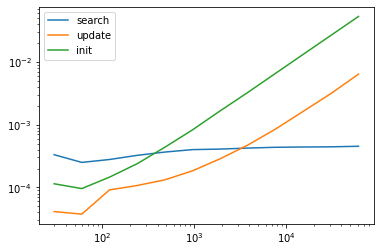

In [11]:
plt.plot(update_bench['n_particles'], update_bench["search_time"], label="search")
plt.plot(update_bench['n_particles'], update_bench["update_time"], label="update")
plt.plot(update_bench['n_particles'], update_bench["init_time"], label="init")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()